In [4]:
import matplotlib.pyplot as plt
import numpy as np
from math import floor

# Simulated Examples

In [11]:
def generate_data(n, sigma):
    X = []
    for _ in range(n):
        x = 0
        for j in range(1, 5):
            x += np.random.multivariate_normal(mean = [2 * (-1) ** floor((j - 1) / 2), 2 * (-1) ** (j - 1)],
                                               cov = sigma * np.eye(2))
        X.append(x)
    return np.array(X)


In [12]:
n = 200
X1 = generate_data(n, 1)    #dataset1
X2 = generate_data(n, 0.5)    #dataset2

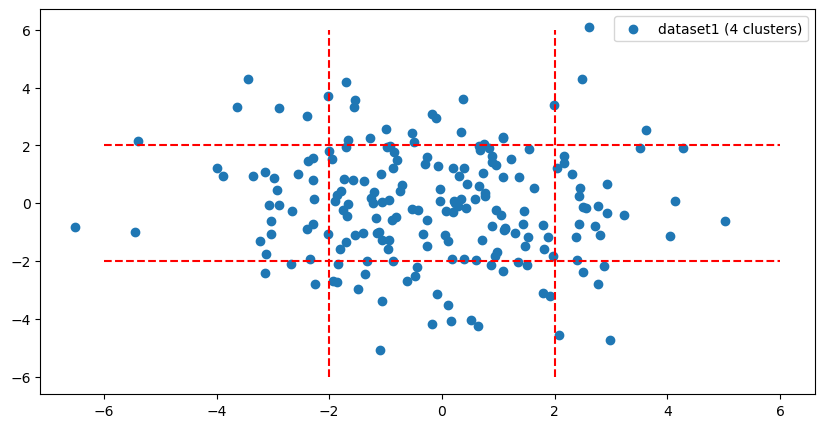

In [18]:
plt.figure(figsize = (10, 5))
plt.scatter(X1[:, 0], X1[:, 1], label = 'dataset1 (4 clusters)')
plt.vlines(-2, -6, 6, colors = 'r', linestyles = 'dashed')
plt.vlines(2, -6, 6, colors = 'r', linestyles = 'dashed')
plt.hlines(-2, -6, 6, colors = 'r', linestyles = 'dashed')
plt.hlines(2, -6, 6, colors = 'r', linestyles = 'dashed')
plt.legend()
plt.show()

In [13]:
X1.shape

(200, 2)